In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_csv("../Database/ready_for_sql/ml_table.csv")
df=file.copy()
df.head()

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,like_count,comment_count,view_count,day_of_week_published,time_published,video_length_seconds
0,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,lmH5uqwaFq8,19653,0,3425275,Tuesday,07:00:15,179.0
1,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,0SY0Yn0yF9o,15076,0,2882582,Saturday,07:00:00,1792.0
2,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,sNyF7BvVfxs,47763,0,8673081,Tuesday,07:00:16,169.0
3,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,K4kqqCzF-BA,57936,0,11744611,Saturday,07:00:12,3681.0
4,UCbCmjCuTUZos6Inko4u57UQ,@cocomelon,Music,142468175305,146000000,811,gfZmvllWVwY,46041,0,8775011,Tuesday,07:00:19,159.0


In [3]:
#make new column that has binary classification. if view count is greather than 1,000,000 then add 1 if less than add 0
def viral(row):
    if row['view_count'] > 1000000:
        return 1
    else:
        return 0

In [4]:
#add the viral column 
df['viral']=df.apply(lambda row: viral(row), axis=1)
df.sample(5)

,channel_id,custom_url,topic_category,channel_view_count,subscriber_count,channel_video_count,video_id,like_count,comment_count,view_count,day_of_week_published,time_published,video_length_seconds,viral
1606,UCYenDLnIHsoqQ6smwKXQ7Hg,NaN,Entertainment,2471180324,8320000,860,Hac_XfYi6PY,6280,162,637365,Sunday,13:01:29,926.0,0
3421,UCvJiYiBUbw4tmpRSZT2r1Hw,@sciencechannel,Entertainment,1020971516,4400000,1908,XmaY9xiM1A4,275,15,9275,Tuesday,16:35:50,57.0,0
3064,UCx-dJoP9hFCBloY9qodykvw,@bazbattles,Knowledge,85826404,711000,76,zmlFnt1pmKE,16290,954,729883,Sunday,12:00:03,768.0,0
313,UCvlE5gTbOvjiolFlEm-c_Ow,@vladandniki,Lifestyle,69985080921,89200000,498,RoBbmLb2KJQ,57044,0,16176389,Saturday,06:00:05,486.0,1
6396,UC9LGi7FRFTxNT7WK6jr6OXw,NaN,Physical_fitness,77694,1650,151,HiJgie8flRo,11,18,96,Saturday,08:36:55,2350.0,0


In [5]:
df['video_id'].nunique()

8408

In [6]:
df.shape

(8993, 14)

In [7]:
#drop duplicates of video id
df=df.drop_duplicates(subset='video_id')
df.shape

(8408, 14)

In [8]:
#remove columns not needed for ml
df=df.drop(['channel_id','custom_url','video_id','channel_view_count','time_published','like_count','comment_count','view_count'],axis=1)
df.sample(5)

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral
673,Music,54000000,140,Thursday,317.0,1
4967,Film,17300000,189,Thursday,329.0,1
3384,Lifestyle,2040000,480,Tuesday,434.0,0
1344,Entertainment,17800000,1973,Thursday,297.0,0
8213,Society,249,1425,Saturday,7634.0,0


In [9]:
df.dtypes

topic_category            object
subscriber_count           int64
channel_video_count        int64
day_of_week_published     object
video_length_seconds     float64
viral                      int64
dtype: object

In [10]:
#null
df.video_length_seconds.isnull().sum()

49

In [11]:
df=df.dropna()
df.isnull().sum()

topic_category           0
subscriber_count         0
channel_video_count      0
day_of_week_published    0
video_length_seconds     0
viral                    0
dtype: int64

In [12]:
#shape of df
print("shape of dataframe is: ", df.shape)

#statistical details of data
df.describe()

shape of dataframe is:  (8359, 6)


,subscriber_count,channel_video_count,video_length_seconds,viral
count,8.359000e+03,8359.000000,8359.000000,8359.000000
mean,1.449562e+07,6570.476612,939.747936,0.198469
std,2.775734e+07,27672.647634,1968.937453,0.398871
min,1.600000e+01,2.000000,0.000000,0.000000
25%,5.310000e+03,165.000000,163.000000,0.000000
50%,2.350000e+06,430.000000,452.000000,0.000000
75%,1.440000e+07,1425.000000,918.000000,0.000000
max,1.460000e+08,246686.000000,42901.000000,1.000000


PREPROCESS DATA

In [13]:
df.head()

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral
0,Music,146000000,811,Tuesday,179.0,1
1,Music,146000000,811,Saturday,1792.0,1
2,Music,146000000,811,Tuesday,169.0,1
3,Music,146000000,811,Saturday,3681.0,1
4,Music,146000000,811,Tuesday,159.0,1


In [14]:
#encode categorical data
le = LabelEncoder()
df['topic_category'] = le.fit_transform(df['topic_category'])
df['day'] = le.fit_transform(df['day_of_week_published'])
df.sample(5)

,topic_category,subscriber_count,channel_video_count,day_of_week_published,video_length_seconds,viral,day
3320,6,5580000,268,Tuesday,307.0,0,5
260,6,91600000,64797,Wednesday,545.0,0,6
5148,13,14600000,3316,Wednesday,599.0,0,6
7129,6,1800,81,Wednesday,521.0,0,6
5154,13,14600000,3316,Wednesday,447.0,0,6


In [15]:
# Day of Week dictionary
weekday_num = {
    "Sunday": 1,
    "Monday": 2,
    "Tuesday": 3,
    "Wednesday": 4,
    "Thursday": 5,
    "Friday": 6,
    "Saturday": 7
}

In [16]:
# weekdays names encoded using the dictionary values
df["day_of_week"] = df["day_of_week_published"].apply(lambda x: weekday_num[x])
df=df.drop(columns=['day','day_of_week_published'])
df.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,viral,day_of_week
0,7,146000000,811,179.0,1,3
1,7,146000000,811,1792.0,1,7
2,7,146000000,811,169.0,1,3
3,7,146000000,811,3681.0,1,7
4,7,146000000,811,159.0,1,3


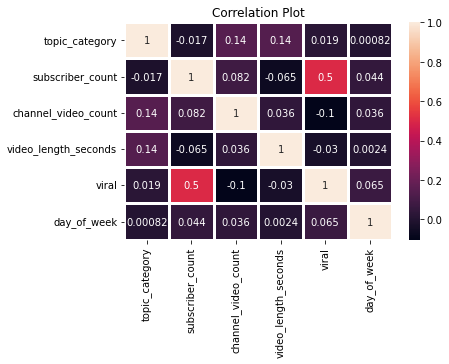

In [17]:
#correlation between features
corr_plot=sns.heatmap(df.corr(),annot=True, linewidths=3)
plt.title("Correlation Plot")
plt.show()

SCALE DATA

In [18]:
#seperate features and target
y=df['viral']
X=df.drop(columns='viral')

In [19]:
X.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,day_of_week
0,7,146000000,811,179.0,3
1,7,146000000,811,1792.0,7
2,7,146000000,811,169.0,3
3,7,146000000,811,3681.0,7
4,7,146000000,811,159.0,3


In [20]:
stds=StandardScaler()
df_scaled=stds.fit_transform(X.to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=['topic_category','subscriber_count','channel_video_count','video_length_seconds','day_of_week'])

df_scaled.head()

,topic_category,subscriber_count,channel_video_count,video_length_seconds,day_of_week
0,0.215727,4.737927,-0.208141,-0.386398,-0.600557
1,0.215727,4.737927,-0.208141,0.432875,1.591367
2,0.215727,4.737927,-0.208141,-0.391477,-0.600557
3,0.215727,4.737927,-0.208141,1.392333,1.591367
4,0.215727,4.737927,-0.208141,-0.396556,-0.600557


RESAMPLE DATA

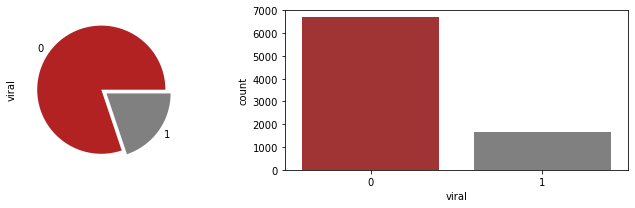

In [21]:
#chart target variables distribution- color #8C000F
fig=plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
colors=['firebrick','gray']
explode=(0,.1)
a=df["viral"].value_counts(normalize=True).plot
a.pie(explode=explode,colors=colors)
fig.add_subplot(1,2,2)
chart=sns.countplot(x=df["viral"],palette=colors)

plt.tight_layout()
plt.show()

In [22]:
#percentage viral/not viral
print("Viral: ", df.viral.value_counts()[1]/len(df)*100,"%")
print("Not Viral: ", df.viral.value_counts()[0]/len(df)*100,"%")

Viral:  19.84687163536308 %
Not Viral:  80.15312836463691 %


In [23]:
#seperate features and target
y=df['viral']
X=df_scaled

In [24]:
#split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(6269, 5)

In [25]:
y.value_counts()

0    6700
1    1659
Name: viral, dtype: int64

In [26]:
#resample data with smoteenn
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 5822, 1: 5723})

In [48]:
#resample with smote
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_smote,y_smote=oversample.fit_resample(X,y)
Counter(y_smote)


Counter({1: 6700, 0: 6700})

LOGISTIC REGRESSION

In [27]:
#create logistic regression model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=150,
                                random_state=1)

#fit train the model
classifier.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=150, random_state=1)

In [28]:
#make predictions
y_pred = classifier.predict(X_test)
#accuracy score
print(accuracy_score(y_test, y_pred))

0.8755980861244019


In [29]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1533,  142],
       [ 118,  297]])

In [30]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1675
           1       0.68      0.72      0.70       415

    accuracy                           0.88      2090
   macro avg       0.80      0.82      0.81      2090
weighted avg       0.88      0.88      0.88      2090



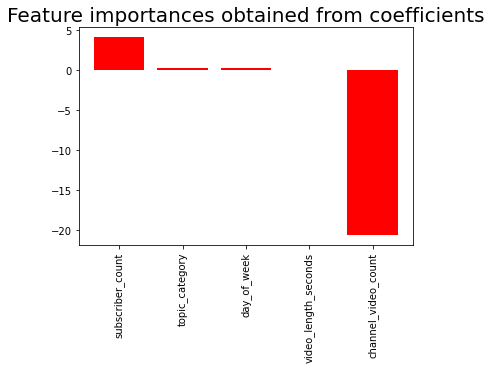

In [31]:
#get feature importance
from matplotlib import pyplot

importance=pd.DataFrame(data={
    'Attribute':X_resampled.columns,
    'Importance':classifier.coef_[0]
})

importance=importance.sort_values(by='Importance', ascending=False)

#graph 
plt.bar(x=importance['Attribute'], height=importance['Importance'], color='red')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


RANDOM FOREST CLASSIFIER

In [32]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

In [33]:
# Create a random forest classifier
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

BalancedRandomForestClassifier(random_state=1)

In [34]:
# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
balanced_accuracy_score(y_test,y_pred)

0.939144038841935

In [35]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1568,  107],
       [  24,  391]])

In [36]:
# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1675
           1       0.79      0.94      0.86       415

    accuracy                           0.94      2090
   macro avg       0.89      0.94      0.91      2090
weighted avg       0.95      0.94      0.94      2090



In [37]:
# List the features sorted in descending order by feature importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5507690094707619, 'subscriber_count'),
 (0.24975458878624882, 'channel_video_count'),
 (0.09097064063649654, 'topic_category'),
 (0.08988660350163531, 'video_length_seconds'),
 (0.01861915760485736, 'day_of_week')]

In [38]:
feature_imp=pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

subscriber_count        0.550769
channel_video_count     0.249755
topic_category          0.090971
video_length_seconds    0.089887
day_of_week             0.018619
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


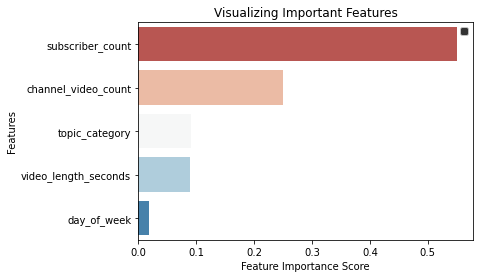

In [39]:
#visualize feature importance
#colors=sns.color_palette("rocket", as_cmap=True)
sns.barplot(x=feature_imp, y=feature_imp.index,palette="RdBu")
plt.style.use("dark_background")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Trying to increase accuracy score

In [40]:
model = BalancedRandomForestClassifier(max_leaf_nodes=24,n_estimators=120, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9106131990649164
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1675
           1       0.73      0.90      0.81       415

    accuracy                           0.91      2090
   macro avg       0.85      0.91      0.88      2090
weighted avg       0.93      0.91      0.92      2090



In [42]:
model = BalancedRandomForestClassifier(max_leaf_nodes=50,n_estimators=50, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9247833123538931
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1675
           1       0.73      0.93      0.82       415

    accuracy                           0.92      2090
   macro avg       0.86      0.92      0.88      2090
weighted avg       0.93      0.92      0.92      2090



In [43]:
model = BalancedRandomForestClassifier(max_leaf_nodes= 80,n_estimators=1200, random_state=1)

# Fitting the model
model.fit(X_resampled, y_resampled)

# Calculated the balanced accuracy score
y_pred=model.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9301672361086135
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1675
           1       0.75      0.94      0.83       415

    accuracy                           0.93      2090
   macro avg       0.87      0.93      0.89      2090
weighted avg       0.94      0.93      0.93      2090



In [51]:
#use smote resampled data 
model_smote = BalancedRandomForestClassifier(random_state=1)

# Fitting the model
model_smote.fit(X_smote, y_smote)

# Calculated the balanced accuracy score
y_pred=model_smote.predict(X_test)
print("ACCURACY SCORE: ",balanced_accuracy_score(y_test,y_pred))

# Print the imbalanced classification report
print(classification_report(y_test,y_pred))

ACCURACY SCORE:  0.9942959899298687
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1675
           1       0.98      0.99      0.99       415

    accuracy                           1.00      2090
   macro avg       0.99      0.99      0.99      2090
weighted avg       1.00      1.00      1.00      2090



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


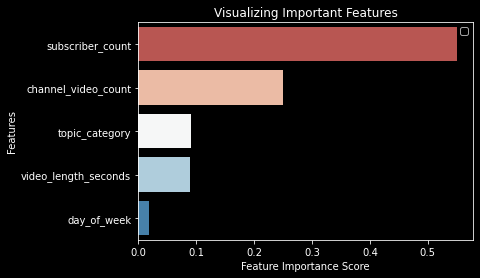

In [50]:
#visualize feature importance
#colors=sns.color_palette("rocket", as_cmap=True)
sns.barplot(x=feature_imp, y=feature_imp.index,palette="RdBu")
plt.style.use("dark_background")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

ADABOOST CLASSIFIER

In [ ]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier

model_eec=EasyEnsembleClassifier(n_estimators=100, random_state=1)
model_eec.fit(X_resampled, y_resampled)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [ ]:
# Calculated the balanced accuracy score
y_pred=model_eec.predict(X_test)

balanced_accuracy_score(y_test, y_pred)

0.9094299586405323

In [ ]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[1529,  146],
       [  39,  376]])

In [ ]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.98      0.91      0.91      0.94      0.91      0.83      1675
          1       0.72      0.91      0.91      0.80      0.91      0.83       415

avg / total       0.92      0.91      0.91      0.92      0.91      0.83      2090

